# SciKitLearn DecisionTreeClassifier (based on CART)

### 1) Loading the digits dataset from the datasets provided in SciKitLearn. 

In [59]:
from sklearn import datasets
digits = datasets.load_digits()
# Features
x = digits.data
# Labels
y = digits.target
# images
images = digits.images

In [60]:
import numpy as np
import pandas as pd
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [61]:
# convert array of int target names to array of str
import numpy as np
t = digits.target_names
target_names=np.array(t).astype('str').tolist()

### 2) Spliting the data set into 70% training data and 30% test data.

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, img_tr, img_ts = train_test_split(x, y, images, test_size=0.3)

In [63]:
att = {}
x_train[1, 9]
for i in range(1200):
    for j in range(64):
        if x_train[i,j] not in att:
            att[x_train[i,j]] = 1
        else:
            att[x_train[i,j]] += 1
att

{0.0: 37548,
 8.0: 2302,
 15.0: 2874,
 16.0: 6956,
 6.0: 1702,
 2.0: 2224,
 11.0: 1910,
 5.0: 1854,
 3.0: 1980,
 13.0: 2378,
 10.0: 1791,
 1.0: 2702,
 4.0: 2176,
 9.0: 1754,
 14.0: 2409,
 12.0: 2471,
 7.0: 1769}

### 3) Set up a DecisionTreeClassifier

In [64]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
# train a decision tree classifier for the digits dataset based on the training data
classifier = classifier.fit(x_train, y_train)

#### Produce a plot of the tree with GraphViz

In [65]:
import graphviz 
dot_data = tree.export_graphviz(classifier, out_file=None,   
                      class_names=target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("digits") 
# graph

'digits.pdf'

### 4) Test the classifier with the remaining test data

In [66]:
# predicting the labels of the test set
y_hat = classifier.predict(x_test)

In [67]:
# Evaluating the classifier
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.78      0.87      0.82        60
           2       0.83      0.83      0.83        53
           3       0.81      0.86      0.83        63
           4       0.82      0.84      0.83        55
           5       0.88      0.90      0.89        58
           6       0.94      0.89      0.91        36
           7       0.80      0.80      0.80        44
           8       0.83      0.67      0.74        60
           9       0.78      0.79      0.79        53

    accuracy                           0.84       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.84      0.84      0.84       540



In [68]:
print(confusion_matrix(y_test, y_hat))

[[56  0  0  0  1  0  0  0  1  0]
 [ 0 52  2  1  2  1  0  0  0  2]
 [ 0  4 44  3  0  0  0  2  0  0]
 [ 0  2  1 54  0  1  0  0  2  3]
 [ 1  2  0  0 46  1  0  3  1  1]
 [ 0  0  0  0  0 52  1  1  2  2]
 [ 1  0  0  0  2  0 32  1  0  0]
 [ 0  0  1  1  2  1  0 35  1  3]
 [ 0  7  4  4  2  1  1  0 40  1]
 [ 0  0  1  4  1  2  0  2  1 42]]


The **min_samples_split** parameter:
will evaluate the number of samples in the node, and 
if the number is less than the minimum the split will be avoided and the node will be a leaf.

The **min_samples_leaf** parameter checks before the node is generated, that is, 
if the possible split results in a child with fewer samples, the split will be avoided 
(since the minimum number of samples for the child to be a leaf has not been reached) 
and the node will be replaced by a leaf.

In all cases, when we have samples with more than one Class in a leaf, the Final Class will be the most likely to happen, according to the samples that reached it in training.

### 5) Tuning parameters

In [69]:
# importing libraries
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
X, Y = x_train, y_train

# Creating a DecisionTreeClassifier
dec_tree = tree.DecisionTreeClassifier()
# Steps : training a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('dec_tree', dec_tree)])


# Creating lists of parameter for Decision Tree Classifier
splitter = ["best", "random"]
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12, None]
splits = [2, 5, 8, 10]
leaves = [1, 2, 3, 4, 5, 6]
# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(#pca__n_components=n_components,
                  dec_tree__splitter=splitter,
                  dec_tree__criterion=criterion,
                  dec_tree__min_samples_split=splits,
                  dec_tree__min_samples_leaf=leaves,
                  dec_tree__max_depth=max_depth)

# Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X, Y)

# Viewing The Best Parameters
print('Best splitter:', clf_GS.best_estimator_.get_params()['dec_tree__splitter'])
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])

/home/nabil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best splitter: random
Best Criterion: entropy
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_depth: 12


/home/nabil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Change the parameters of the classifier

In [70]:
classifier = tree.DecisionTreeClassifier(splitter="best",
                                         criterion="entropy",
                                         min_samples_split=2,
                                         min_samples_leaf=1,
                                         max_depth=None)
# training
classifier = classifier.fit(x_train, y_train)

# predicting the labels of the test set
y_hat = classifier.predict(x_test)

# Evaluation
print(classification_report(y_test, y_hat))
print(confusion_matrix(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        58
           1       0.85      0.88      0.87        60
           2       0.77      0.91      0.83        53
           3       0.87      0.86      0.86        63
           4       0.86      0.78      0.82        55
           5       0.92      0.81      0.86        58
           6       0.89      0.94      0.92        36
           7       0.71      0.84      0.77        44
           8       0.74      0.57      0.64        60
           9       0.80      0.85      0.83        53

    accuracy                           0.83       540
   macro avg       0.83      0.84      0.83       540
weighted avg       0.83      0.83      0.83       540

[[55  0  0  0  0  0  0  0  2  1]
 [ 0 53  2  0  1  0  0  0  3  1]
 [ 0  0 48  3  0  0  0  2  0  0]
 [ 0  0  3 54  0  1  0  1  2  2]
 [ 4  1  0  0 43  1  3  3  0  0]
 [ 0  0  0  2  0 47  1  1  4  3]
 [ 1  0  0  0  1  0 34  0  0  0]
 [ 0  0  1

## ID3:

In [71]:
# libraries
import collections
import ToyData as td
import ID3

### ----------------------- ToyData -------------------------

In [72]:
# Importing data
attributes, classes, data, target, data2, target2 = td.ToyData().get_data()

In [73]:
# ID3 classifier
id3 = ID3.ID3DecisionTreeClassifier()

# Fitting the model
myTree = id3.fit(data, target, attributes, classes)

Tree:
 // The Decision Tree: ID3
digraph {
	0 [label="
id: 0
value: -
attribute: size
entropy: 0.9886994082884974
samples: 16
classCounts: {'+': 9, '-': 7}"]
	1 [label="
id: 1
value: s
attribute: shape
entropy: 0.8112781244591328
samples: 8
classCounts: {'+': 6, '-': 2}"]
	0 -> 1
	2 [label="
id: 2
value: r
attribute: color
entropy: 0.9182958340544896
samples: 6
classCounts: {'+': 4, '-': 2}"]
	1 -> 2
	3 [label="
id: 3
value: y
label: +
entropy: 0.7219280948873623
samples: 5
classCounts: {'+': 4, '-': 1}"]
	2 -> 3
	4 [label="
id: 4
value: g
label: -
entropy: 0
samples: 1
classCounts: {'-': 1}"]
	2 -> 4
	5 [label="
id: 5
value: b
label: +
samples: 0"]
	2 -> 5
	6 [label="
id: 6
value: i
label: +
entropy: 0
samples: 2
classCounts: {'+': 2}"]
	1 -> 6
	7 [label="
id: 7
value: l
attribute: color
entropy: 0.9544340029249649
samples: 8
classCounts: {'-': 5, '+': 3}"]
	0 -> 7
	8 [label="
id: 8
value: y
attribute: shape
entropy: 0.9852281360342516
samples: 7
classCounts: {'+': 3, '-': 4}"]
	7 -> 

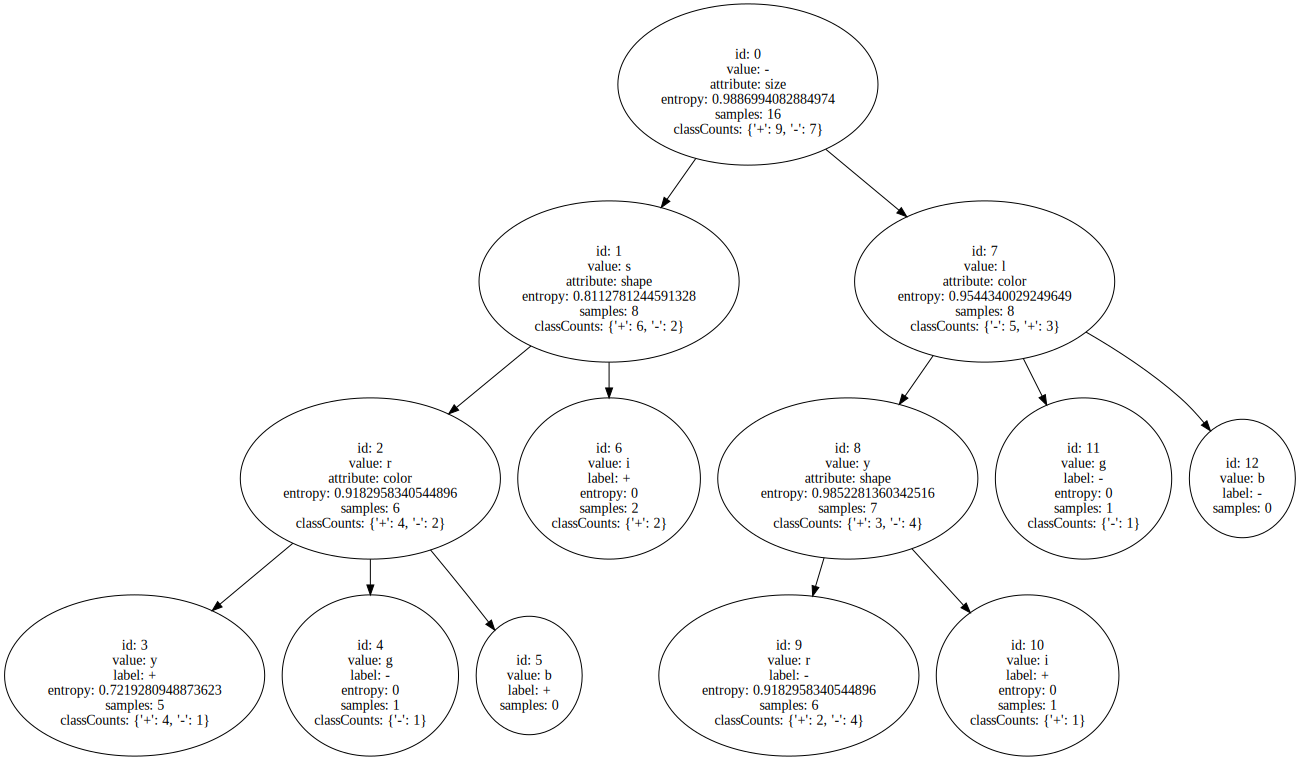

In [74]:
# Visualization of the Tree
plot = id3.make_dot_data()
# Text form
print("Tree:\n", plot.source, "\n")
# graphic form
plot.render("testTree")
graphviz.Source(plot) 

In [75]:
# Testing the model
predicted = id3.predict(data2, myTree)

# Evaluation
print("Confusion matrix:\n", confusion_matrix(predicted, target2), "\n")
print("classification report:\n", classification_report(predicted, target2), "\n")

Confusion matrix:
 [[2 1]
 [1 1]] 

classification report:
               precision    recall  f1-score   support

           +       0.67      0.67      0.67         3
           -       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5
 



### ------------------------ Digits -----------------------------------

In [76]:
# Ordered Attributes : 1..16
attributes = collections.OrderedDict()
for i in range(64):
    attributes[i] = [j for j in range(17)]

In [77]:
# The classifier ID3
clf = ID3.ID3DecisionTreeClassifier()

# Fitting the model
tree = clf.fit(x_train, y_train, attributes, target_names)

In [78]:
# Visualization
plot = clf.make_dot_data()
plot.render("digitsTree_16")
# print("Tree:\n", plot.source, "\n")

'digitsTree_16.pdf'

In [79]:
# Testing the model
y_hat = clf.predict(x_test, tree)
print("Confusion matrix:\n", confusion_matrix(y_test, y_hat), "\n")
print("classification report:\n", classification_report(y_test, y_hat), "\n")

Confusion matrix:
 [[25  2  3 10  5  0  0  3  5  5]
 [ 0 15  5  3 18  7  3  5  2  2]
 [ 2  4 19  2  2  7  0 10  4  3]
 [ 5  5  8 16  7  5  1  6  6  4]
 [ 1  5  1  0 31  0  7  4  4  2]
 [ 1  5  2  2  5 38  3  1  1  0]
 [ 0  0  1  0  1  4 30  0  0  0]
 [ 3  5  5  0  5  2  0 16  5  3]
 [ 4  5  5  7  6  0  0 16 12  5]
 [10  4  4  7  2  0  0  3  3 20]] 

classification report:
               precision    recall  f1-score   support

           0       0.49      0.43      0.46        58
           1       0.30      0.25      0.27        60
           2       0.36      0.36      0.36        53
           3       0.34      0.25      0.29        63
           4       0.38      0.56      0.45        55
           5       0.60      0.66      0.63        58
           6       0.68      0.83      0.75        36
           7       0.25      0.36      0.30        44
           8       0.29      0.20      0.24        60
           9       0.45      0.38      0.41        53

    accuracy                

In [80]:
# Ordered Attributes : dark, light, gray
attributes = collections.OrderedDict()
for i in range(64):
    attributes[i] = ['dark', 'light', 'gray']
    
# Modify your data set to contain only three values for the attributes
X = np.array(x, dtype='<U21')
for i in range(len(x)):
    for j in range(64):
        if x[i,j] < 5:
            X[i,j] = 'dark'
        elif x[i,j] > 10:
            X[i,j] = 'light'
        else:
            X[i,j] = 'gray'
            
# Splitting the new data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [81]:
# building a new model
clf = ID3.ID3DecisionTreeClassifier()
tree = clf.fit(x_train, y_train, attributes, target_names)

# Visualize
plot = clf.make_dot_data()
plot.render("digitsTree_3")

# Testing it
y_hat = clf.predict(x_test, tree)

# Evaluation:
print("Confusion matrix:\n", confusion_matrix(y_test, y_hat), "\n")
print("classification report:\n", classification_report(y_test, y_hat), "\n")

Confusion matrix:
 [[56  0  0  1  0  1  1  0  1  0]
 [ 0 36  2  1  1  7  0  1  4  0]
 [ 1  5 42  6  1  1  0  0  5  0]
 [ 1  0  2 48  0  2  0  4  2  5]
 [ 0  2  0  0 36  1  2  0  2  2]
 [ 3  2  0  0  1 47  0  1  2  3]
 [ 0  1  1  0  3  0 39  1  0  0]
 [ 1  0  1  1  3  1  0 38  1  0]
 [ 0  7  1  1  3  0  2  0 34  2]
 [ 0  0  2  0  1  3  0  1  6 45]] 

classification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.68      0.69      0.69        52
           2       0.82      0.69      0.75        61
           3       0.83      0.75      0.79        64
           4       0.73      0.80      0.77        45
           5       0.75      0.80      0.77        59
           6       0.89      0.87      0.88        45
           7       0.83      0.83      0.83        46
           8       0.60      0.68      0.64        50
           9       0.79      0.78      0.78        58

    accuracy                